# Example of plot2d

Functions are defined in /scripts/python3/postel/plot2d.py

The implementation of the 2d plots allows the user to pile up different layers, for example: mesh, color map, vectors etc. In this tutorial, the basic 2d plot logic is presented as well as several 2d plot functions.

In [1]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.formats.regular_grid import interpolate_on_grid
from postel.plot2d import *

## Importing Telemac results

In [2]:
# File we are going to use
file_name = path.join(environ['HOMETEL'],'examples','telemac2d','gouttedo','f2d_gouttedo.slf')

# Initalisaing Telemac file reader
res = TelemacFile(file_name)

# Getting values
timeframe = 20
water_depth = res.get_data_value('WATER DEPTH', timeframe)
velocity_x = res.get_data_value('VELOCITY U', timeframe)
velocity_y = res.get_data_value('VELOCITY V', timeframe)

print("Imported results at time = %d s" %res.times[timeframe])

Imported results at time = 4 s


## Plot the 2d mesh and point location

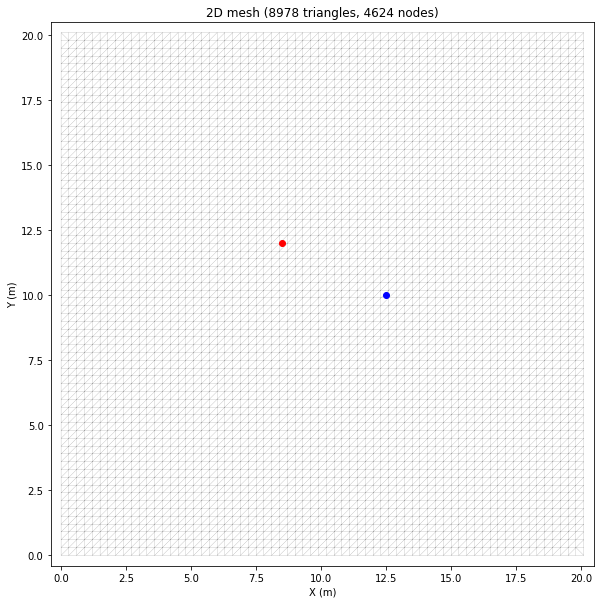

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')

# Plot mesh
plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

# Plot points
ax.plot(12.5, 10, 'bo')
ax.plot(8.5, 12, 'ro')

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))
plt.show()
plt.close(fig)

## Plot scalar map

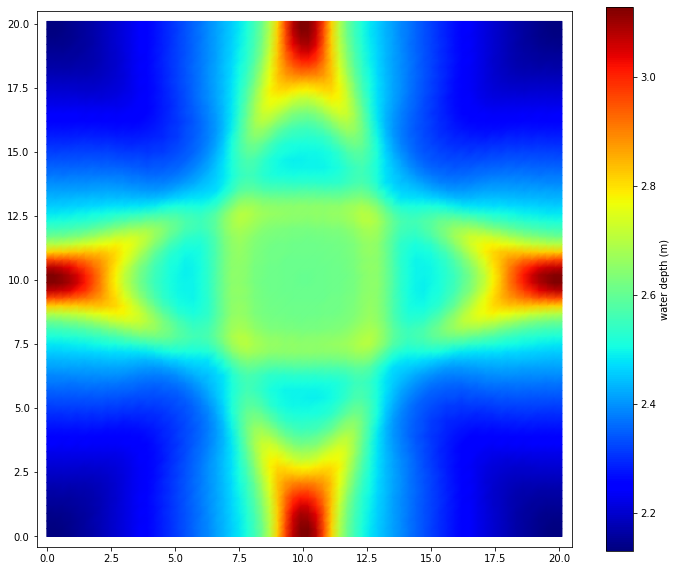

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_aspect('equal')

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')

plt.show()
plt.close(fig)

## Plot scalar map and contours

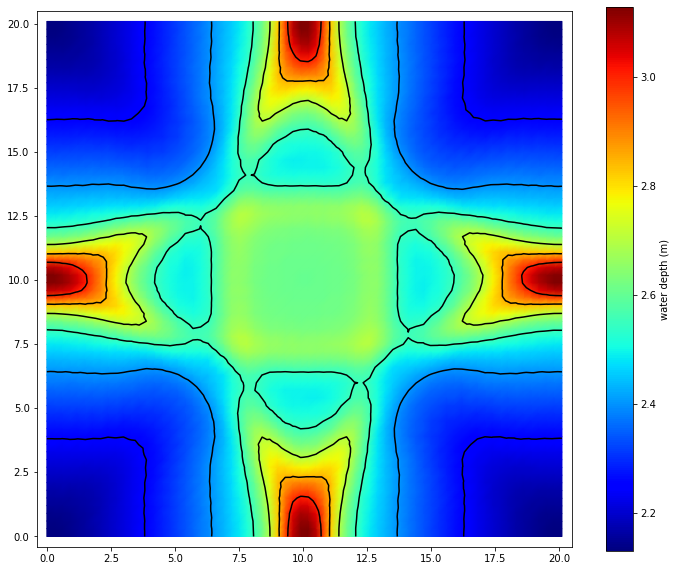

In [5]:
# Plot the 2d triangulation + scalar map + scalar contour
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_aspect('equal')

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')
plot2d_scalar_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', colors='k', colorbar=False)

plt.show()
plt.close(fig)

## Plot filled contours

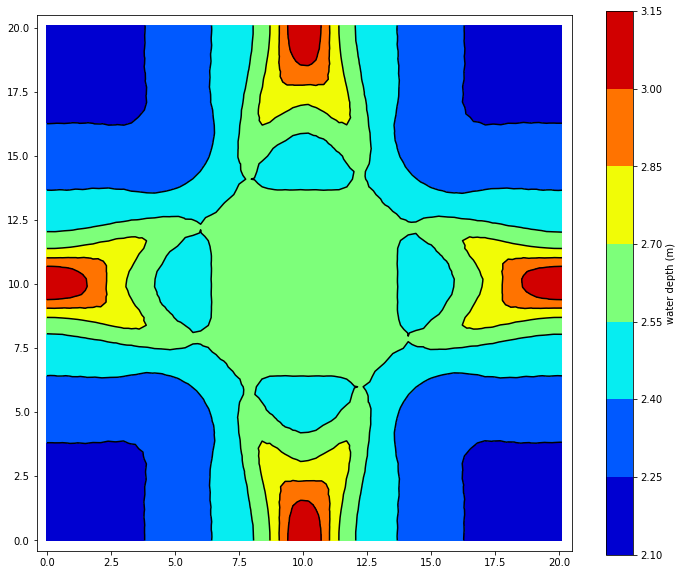

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_aspect('equal')

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)')
plot2d_scalar_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', colors='k', colorbar=False)

plt.show()
plt.close(fig)

## Managing color bars

### Using vmin, vmax, nv and cbar_ticks options with scalar_map

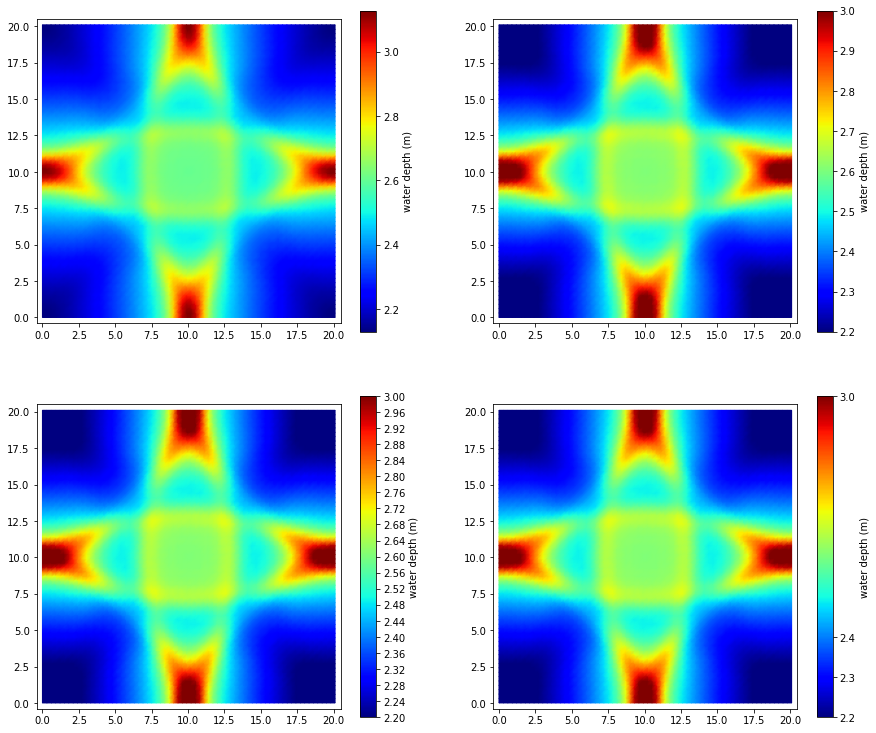

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13))

# First plot:
ax = axes[0, 0]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')

# Second plot:
ax = axes[0, 1]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  vmin=2.2, vmax=3.)
# Third plot:
ax = axes[1, 0]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  vmin=2.2, vmax=3., nv=21)
# Fourth plot:
ax = axes[1, 1]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  vmin=2.2, vmax=3., cbar_properties={'ticks':[2.2, 2.3, 2.4, 3.]})

plt.show()
plt.close(fig)

### Using vmin, vmax, nv, levels, cbar_ticks and extend options with scalar_filled_contour

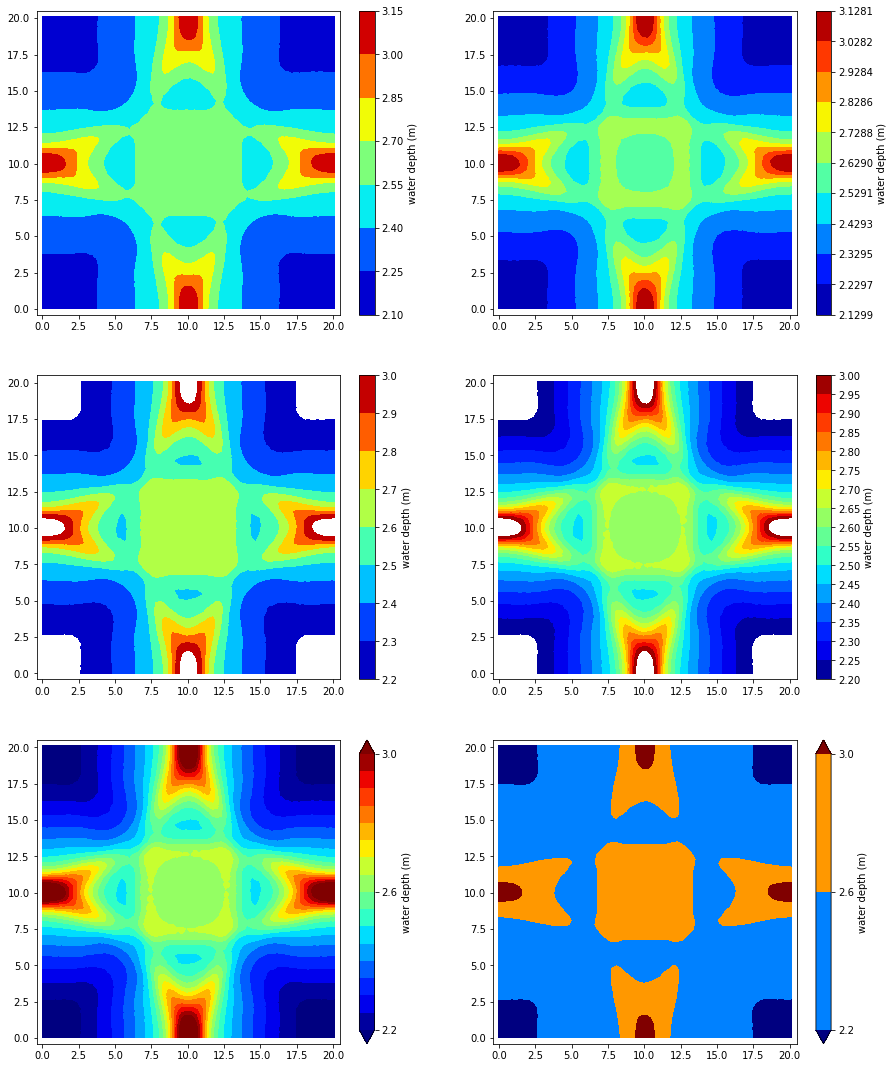

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(15, 19))

# First plot:
ax = axes[0, 0]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', nv=5)

# Second plot:
ax = axes[0, 1]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                             vmin=np.min(water_depth), vmax=np.max(water_depth))
# Third plot:
ax = axes[1, 0]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                             vmin=2.2, vmax=3., nv=9)
# Fourth plot:
ax = axes[1, 1]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                             levels=np.linspace(2.2, 3., 17))
# Fifth plot:
ax = axes[2, 0]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                             levels=np.linspace(2.2, 3., 17),
                             cbar_properties={'ticks':[2.2, 2.6, 3.]},
                             extend='both')
# sixth plot:
ax = axes[2, 1]
ax.set_aspect('equal')
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                             vmin=2.2, vmax=3., nv=3,
                             cbar_properties={'ticks':[2.2, 2.6, 3.]},
                             extend='both')
plt.show()
plt.close(fig)

### Defining custom cmap and color bar

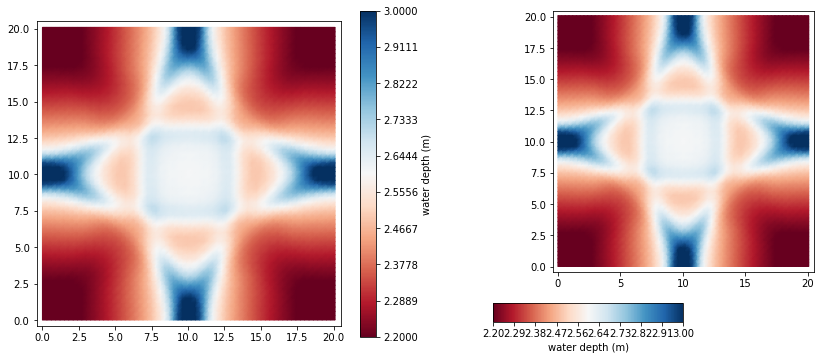

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: standard colorbar
ax = axes[0]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  colorbar=True, vmin=2.2, vmax=3., nv=10, cmap_name='RdBu')

# Second plot: custom color bar:
ax = axes[1]
ax.set_aspect('equal')

cbar_deco = {
    'orientation': 'horizontal',
    'fraction': 0.15,
    'pad': 0.05,
    'shrink': 0.5,
    'aspect': 10.0,
    'ticks': None,
    'format': '%.2f',
    }

plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  vmin=2.2, vmax=3., nv=10, cmap_name='RdBu', cbar_properties=cbar_deco)

plt.show()
plt.close(fig)


### Share colorbar on two axes

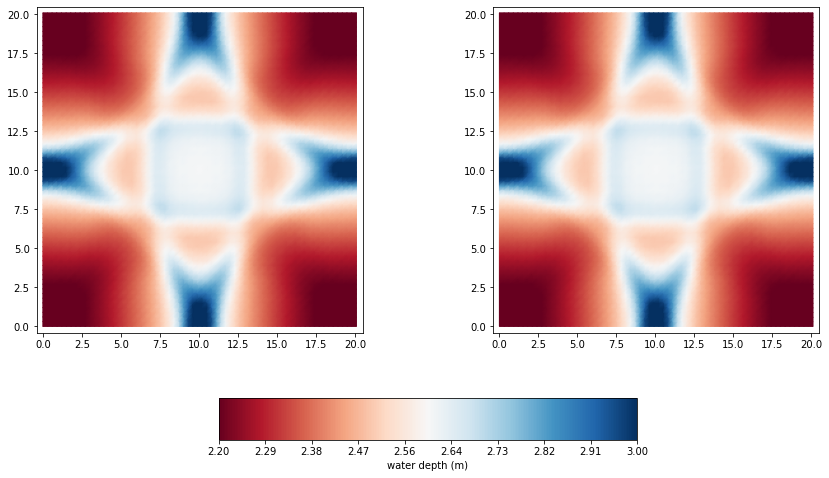

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

cbar_deco = {
    'orientation': 'horizontal',
    'fraction': 0.1,
    'pad': 0.15,
    'shrink': 0.5,
    'aspect': 10.0,
    'anchor': (0.5, 1.0),
    'panchor': (0.5, 0.0),
    'format': '%.2f',
    }

# First plot: standard colorbar
ax = axes[0]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  colorbar=False, vmin=2.2, vmax=3., nv=10, cmap_name='RdBu')

# Second plot: custom color bar:
ax = axes[1]
ax.set_aspect('equal')
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)',
                  vmin=2.2, vmax=3., nv=10, cmap_name='RdBu', cbar_ax=axes, cbar_properties=cbar_deco)

plt.show()
plt.close(fig)


## Plot scalar map and  velocity streamlines

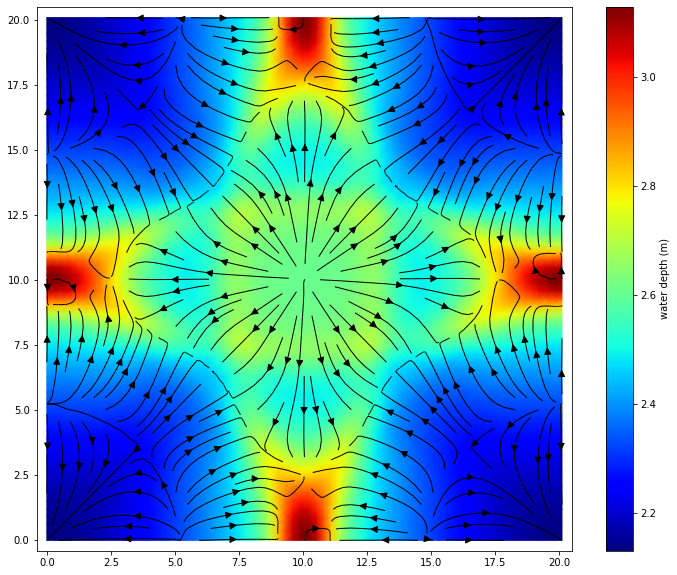

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')
plot2d_streamlines(fig, ax, res.tri, velocity_x, velocity_y, data_name='velocity (m/s)', color='k',
                   colorbar=False, linewidth=1.)

plt.show()
plt.close(fig)

## Plot colored velocity streamlines

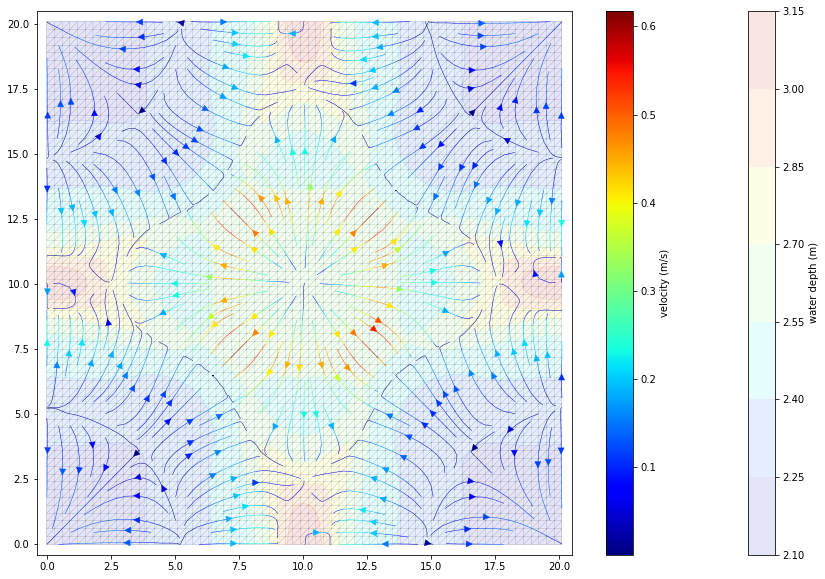

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', alpha = 0.1)
plot2d_streamlines(fig, ax, res.tri, velocity_x, velocity_y, data_name='velocity (m/s)')

plt.show()
plt.close(fig)

## Plot scalar map with velocity vectors on triangular mesh

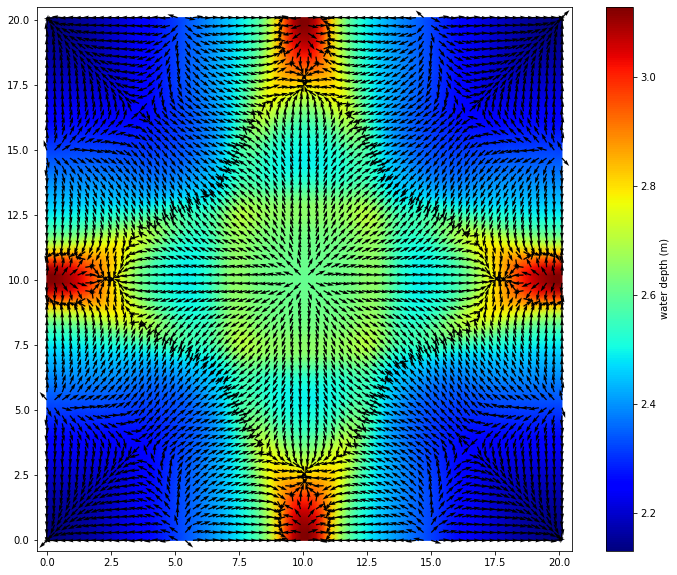

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')
plot2d_vectors(fig, ax, res.tri, velocity_x, velocity_y, data_name='velocity (m/s)', color='k')
    
plt.show()
plt.close(fig)

## Plot scalar map with velocity vectors on subgrid

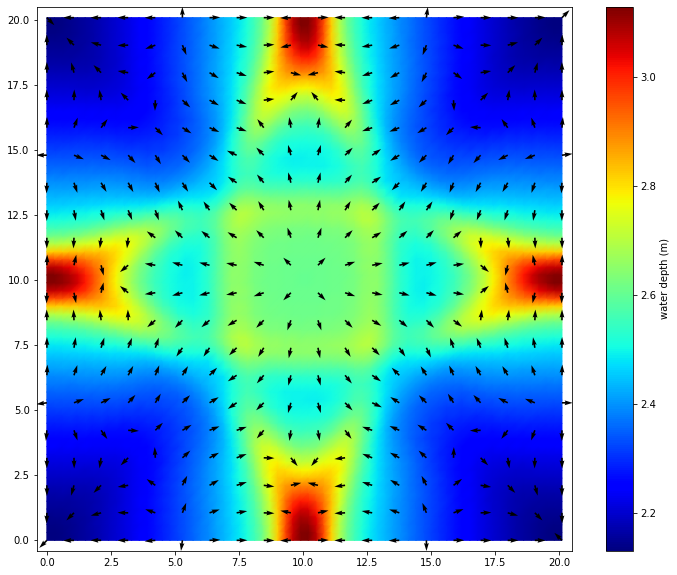

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_map(fig, ax, res.tri, water_depth, data_name='water depth (m)')
plot2d_vectors(fig, ax, res.tri, velocity_x, velocity_y,
               grid_resolution=[20, 20],
               data_name='velocity', color='k')
    
plt.show()
plt.close(fig)

## Plot colored velocity vectors

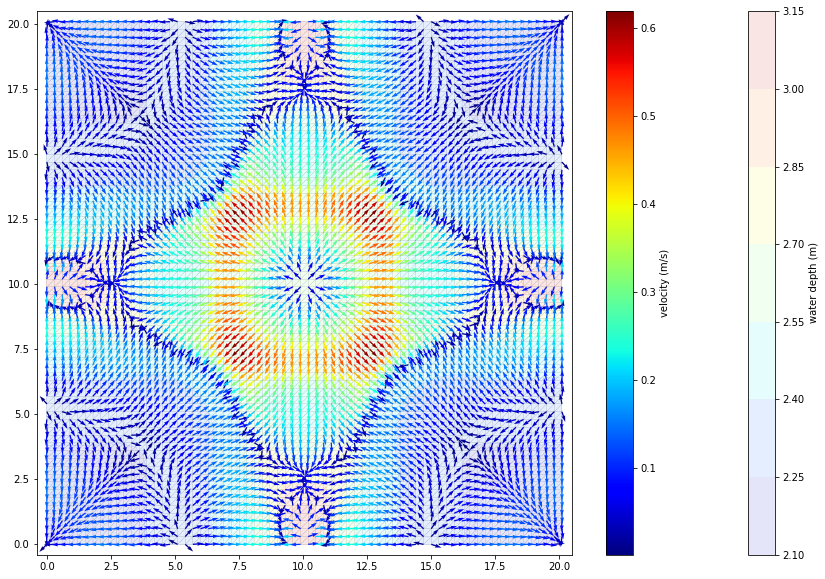

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', alpha = 0.1)
plot2d_vectors(fig, ax, res.tri, velocity_x, velocity_y, data_name='velocity (m/s)')

plt.show()
plt.close(fig)

## Plot velocity vectors without normalization

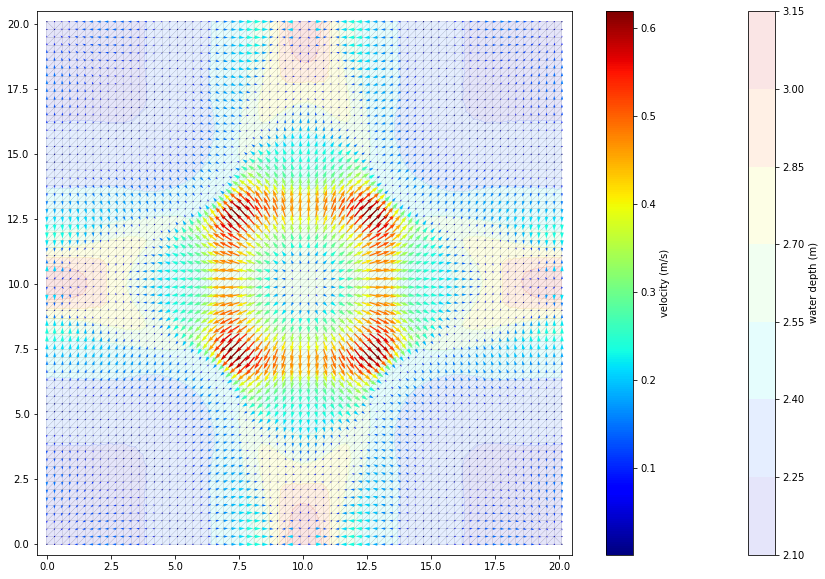

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)
plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, data_name='water depth (m)', alpha = 0.1)
plot2d_vectors(fig, ax, res.tri, velocity_x, velocity_y, data_name='velocity (m/s)',
               normalize=False, scale=20)

plt.show()
plt.close(fig)

## Plot scalar map on regular grid

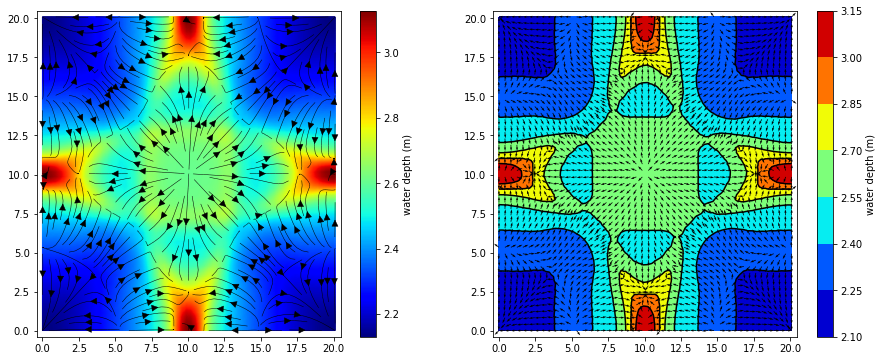

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Grids and interpolated data definition
water_depth_ongrid, grid1 = interpolate_on_grid(res.tri, water_depth)
velocity_x_ongrid, grid2 = interpolate_on_grid(res.tri, velocity_x, grid_resolution=(50, 50))
velocity_y_ongrid, grid2 = interpolate_on_grid(res.tri, velocity_y, grid_resolution=(50, 50))

# Plot scalar map on grid1 and streamlines on grid2
plot2d_scalar_map(fig, ax[0], grid1, water_depth_ongrid, data_name='water depth (m)')
plot2d_streamlines(fig, ax[0], grid2, velocity_x_ongrid, velocity_y_ongrid, data_name='velocity (m/s)', color='k')

# Plot contours on grid1 and vectors on grid2
plot2d_scalar_contour(fig, ax[1], grid1, water_depth_ongrid, data_name='water depth (m)', colors='k', colorbar=False)
plot2d_scalar_filled_contour(fig, ax[1], grid1, water_depth_ongrid, data_name='water depth (m)')
plot2d_vectors(fig, ax[1], grid2, velocity_x_ongrid, velocity_y_ongrid, data_name='velocity (m/s)', color='k')

plt.show()
plt.close(fig)

## Plot a 2D quadrangle mesh

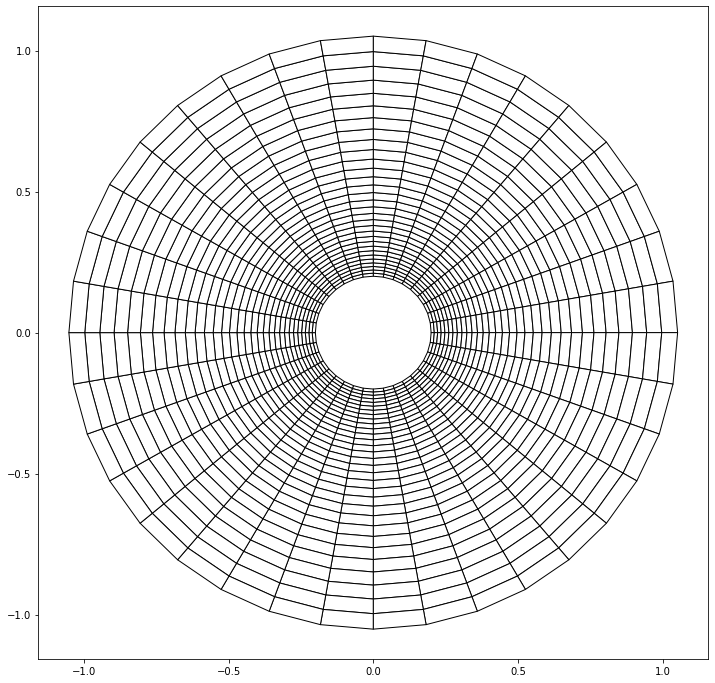

In [18]:
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import plot2d_quadrangle_mesh
from os import environ, path
import matplotlib.pyplot as plt

file_name = path.join(environ['HOMETEL'], 'examples', 'tomawac', 'impose_spectra', 'tom_OceanicResults_dt10.spe')

res = TelemacFile(file_name)

x = res.meshx
y = res.meshy
ikle = res.ikle2

fig, axe = plt.subplots(figsize=(12, 12))

plot2d_quadrangle_mesh(fig, axe, x, y, ikle, facecolors='w', edgecolors='k')

axe.autoscale()

plt.show()
del res